In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neuralNetwork
from loadData import load
from sklearn.neural_network import MLPClassifier

%matplotlib inline

In [67]:
x = []
trainClassificationErrors = []
testClassificationErrors = []
trainCEErrors = []
testCEErrors = []
models = []

trainData, trainLabels, testData, testLabels = load()
for numHiddenNodes in xrange(5, 500, 5):
    model = neuralNetworkTrain(trainData, trainLabels, numHiddenNodes)
    models.append(model)

    trainClassificationError = neuralNetworkEvaluate(model, trainData, trainLabels)
    testClassificationError = neuralNetworkEvaluate(model, testData, testLabels)
    
    trainCEError = np.sum(model.predict_log_proba(trainData))
    testCEError = np.sum(model.predict_log_proba(testData))

    x.append(numHiddenNodes)
    trainClassificationErrors.append(trainClassificationError)
    testClassificationErrors.append(testClassificationError)
    trainCEErrors.append(trainCEError)
    testCEErrors.append(testCEError)

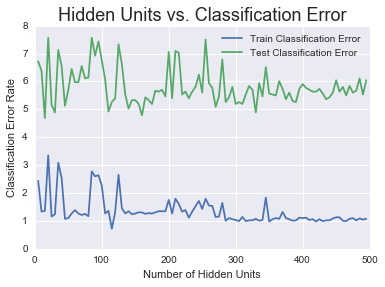

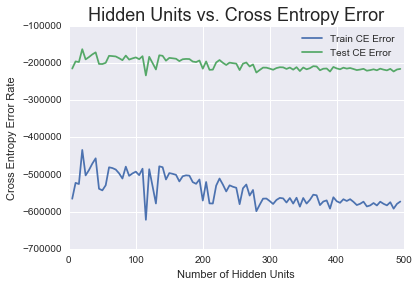

In [68]:
plt.plot(x, trainClassificationErrors, label="Train Classification Error")
plt.plot(x, testClassificationErrors, label="Test Classification Error")
plt.title("Hidden Units vs. Classification Error", fontsize=18)
plt.xlabel("Number of Hidden Units")
plt.ylabel("Classification Error Rate")
plt.legend()
plt.show()

plt.plot(x, trainCEErrors, label="Train CE Error")
plt.plot(x, testCEErrors, label="Test CE Error")
plt.title("Hidden Units vs. Cross Entropy Error", fontsize=18)
plt.xlabel("Number of Hidden Units")
plt.ylabel("Cross Entropy Error Rate")
plt.legend()
plt.show()

### Based on the above graph, we choose an optimal range of hidden node values to further experiment on. Let's say this range is 150-350

In [69]:
xData = []
trainErrorData = []
testErrorData = []
trainCEErrorData = []
testCEErrorData = []

potentialActivations = ["logistic", "tanh", "relu"]
trainData, trainLabels, testData, testLabels = load()
for activationFcn in potentialActivations:
    x = []
    trainErrors = []
    testErrors = []
    trainCEErrors = []
    testCEErrors = []

    for numHiddenNodes in xrange(150, 350, 5):
        model = neuralNetworkTrain(trainData, trainLabels, numHiddenNodes, activationFcn)

        trainError = neuralNetworkEvaluate(model, trainData, trainLabels)
        testError = neuralNetworkEvaluate(model, testData, testLabels)
        
        trainCEError = np.sum(model.predict_log_proba(trainData))
        testCEError = np.sum(model.predict_log_proba(testData))

        x.append(numHiddenNodes)
        trainErrors.append(trainError)
        testErrors.append(testError)
        trainCEErrors.append(trainCEError)
        testCEErrors.append(testCEError)
        
    xData.append(x)
    trainErrorData.append(trainErrors)
    testErrorData.append(testErrors)
    trainCEErrorData.append(trainCEErrors)
    testCEErrorData.append(testCEErrors)

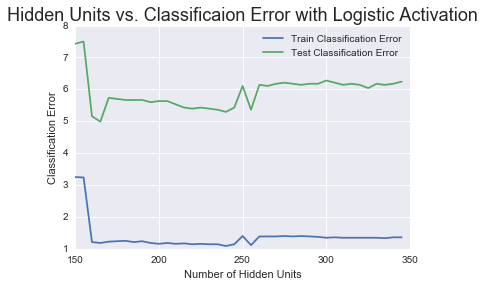

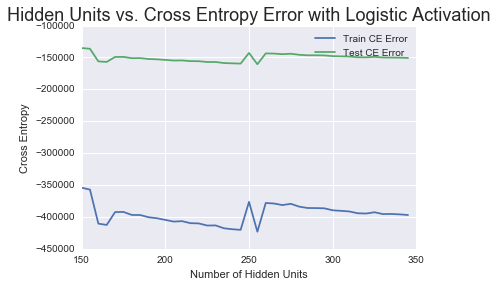

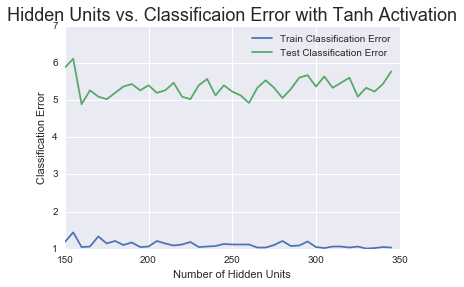

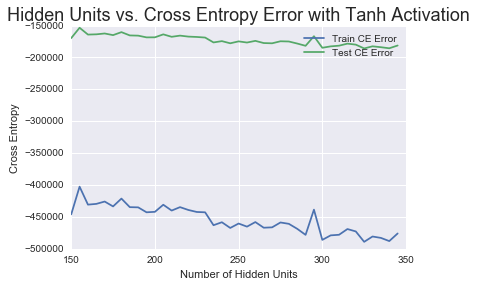

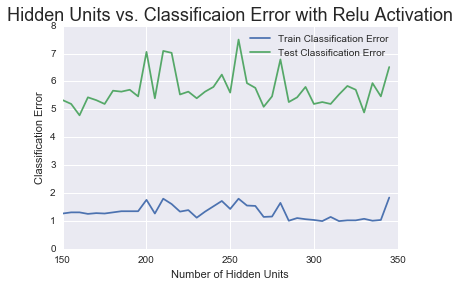

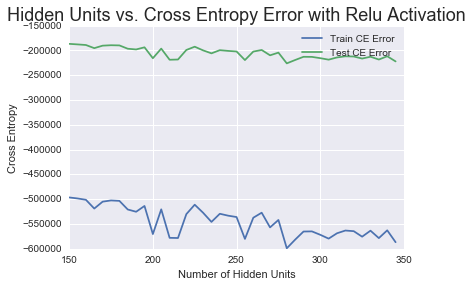

In [70]:
activationFunctions = ["Logistic", "Tanh", "Relu"]
for i in xrange(len(xData)):
    plt.plot(xData[i], trainErrorData[i], label="Train Classification Error")
    plt.plot(xData[i], testErrorData[i], label="Test Classification Error")
    plt.title("Hidden Units vs. Classificaion Error with " + activationFunctions[i] + " Activation", fontsize=18)
    plt.xlabel("Number of Hidden Units")
    plt.ylabel("Classification Error")
    plt.legend()
    plt.show()
    
    plt.plot(xData[i], trainCEErrorData[i], label="Train CE Error")
    plt.plot(xData[i], testCEErrorData[i], label="Test CE Error")
    plt.title("Hidden Units vs. Cross Entropy Error with " + activationFunctions[i] + " Activation", fontsize=18)
    plt.xlabel("Number of Hidden Units")
    plt.ylabel("Cross Entropy")
    plt.legend()
    plt.show()

### Again, based on these graphs, we see the most stable results using a logistic activation function. We'll now try using logistic activation over the entire initial range of hidden nodes to see if we find a different optimal value.

In [34]:
x = []
trainErrors = []
testErrors = []
models = []

trainData, trainLabels, testData, testLabels = load()
for numHiddenNodes in xrange(5, 500, 5):
    model = neuralNetworkTrain(trainData, trainLabels, numHiddenNodes, "logistic")
    models.append(model)

    trainError = neuralNetworkEvaluate(model, trainData, trainLabels)
    testError = neuralNetworkEvaluate(model, testData, testLabels)

    x.append(numHiddenNodes)
    trainErrors.append(trainError)
    testErrors.append(testError)

/Users/msamuel/Projects/scikit-learn/sklearn/neural_network/multilayer_perceptron.py:554: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


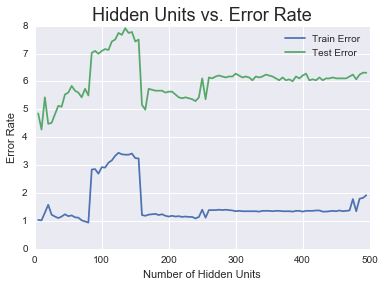

In [35]:
plt.plot(x, trainErrors, label="Train Error")
plt.plot(x, testErrors, label="Test Error")
plt.title("Hidden Units vs. Error Rate", fontsize=18)
plt.xlabel("Number of Hidden Units")
plt.ylabel("Error Rate")
plt.legend()
plt.show()

### We can probably narrow down the minimum rate to the range 150 to 250 hidden units. Now let's see what learning rates work best

In [36]:
xData = []
trainErrorData = []
testErrorData = []

learningRates = [0.1, 0.01, 0.001, 0.0001]
trainData, trainLabels, testData, testLabels = load()
for learningRate in learningRates:
    x = []
    trainErrors = []
    testErrors = []

    for numHiddenNodes in xrange(150, 250, 5):
        model = neuralNetworkTrain(trainData, trainLabels, numHiddenNodes, "logistic", learningRate)

        trainError = neuralNetworkEvaluate(model, trainData, trainLabels)
        testError = neuralNetworkEvaluate(model, testData, testLabels)

        x.append(numHiddenNodes)
        trainErrors.append(trainError)
        testErrors.append(testError)
        
    xData.append(x)
    trainErrorData.append(trainErrors)
    testErrorData.append(testErrors)

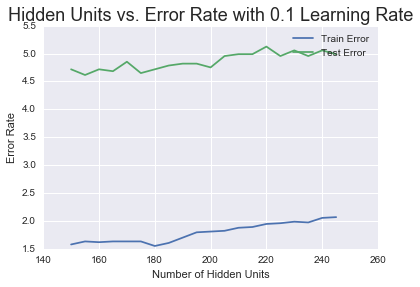

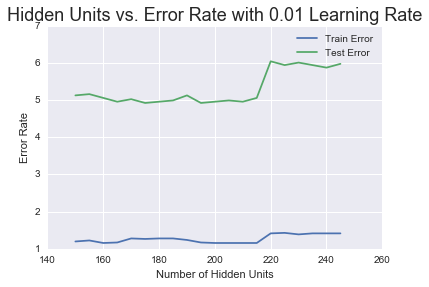

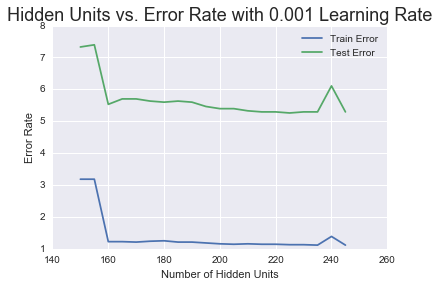

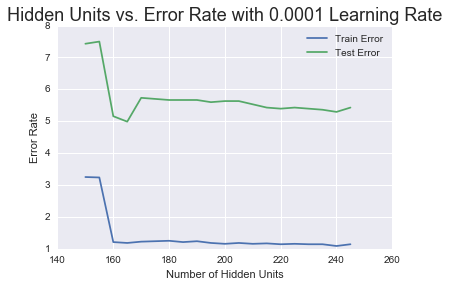

In [38]:
for i in xrange(len(xData)):
    plt.plot(xData[i], trainErrorData[i], label="Train Error")
    plt.plot(xData[i], testErrorData[i], label="Test Error")
    plt.title("Hidden Units vs. Error Rate with " + str(learningRates[i]) + " Learning Rate", fontsize=18)
    plt.xlabel("Number of Hidden Units")
    plt.ylabel("Error Rate")
    plt.legend()
    plt.show()